# Neural Network
Neural Network project is an implementation of atificial Neural Network :D :D.
<br/><br/>
In this repository there are two important files:
1) Network.py:<br/>
    In that file there is a NeuralNetwork class, which is an implementation of a neural network that allows you to create a neural network with dense layers (Fully Connected Layer). The number of layers in the network and the number of neurons in each layer is determined by the argument of the constructor. The class also implements backpropagation, allows you to train the network and apply such regularizations as DropDown, L1/L2 regularizations. The class also allows you to save a network to a file and load network from a file.
  
2) MNIST_loader.py <br/>
    This file contains functions that allow you to load data for training and testing from files in the "MNIST" directory into ndarray objects (into numpy arrays). This data is MNIST (images of handwritten digits and their corresponding digits).

#### Instruction for use:
First import all necessary modules.

In [4]:
from Network import Network
import MNIST_loader as MN

Then you need to load data used to train and test the network. You can use load_training_tuples and load_test_tuples functions fot that. The load_training_tuples function returns a list of tuples (list[tuple[np.ndarray, int]). The first element of each tuple is a numpy array representing the image of a digit. The second element of the tuple is an int being that digit. Exactly such a list is required by the network training function.
A load_test_tuples function does the same as load_training_tuples, but returns data for testing. (The MNIST collection defines 60,000 examples for training and 10,000 examples for testing.)

In [6]:
train_data = MN.load_training_tuples()
test_data = MN.load_test_tuples()

In [19]:
len(train_data), len(test_data)

(60000, 10000)

As you can see shape of each numpy array, which represents an image, is (784, 1). (Image width ad height is 28 and 28*28=784.)

In [5]:
train_data[47921][0].shape, train_data[47921][1], type(train_data[47921][1])

((784, 1), 4, int)

In [6]:
test_data[5123][0].shape, test_data[5123][1], type(test_data[5123][1])

((784, 1), 4, int)

You can use "show_image" function to display an image.

Cyfra odpowiadająca poniższemu obrazowi to 9.


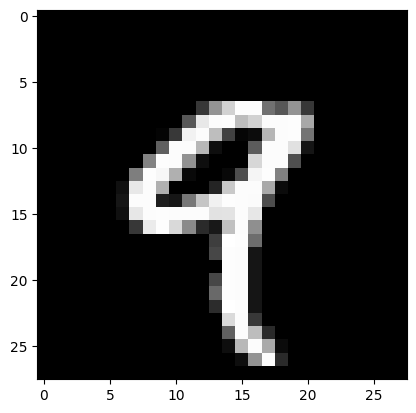

In [10]:
print(f'Cyfra odpowiadająca poniższemu obrazowi to {train_data[4][1]}.')
MN.show_image(train_data[4][0])

Let's create a simple network.

In [ ]:
my_net1 = Network((784, 30, 10))

To the constructor you need to pass the shape of the network - an information about how many layers the network has and how many neurons are in each layer.

The test_net method is used to test the network. It returns the number of all correctly qualified examples divided by the number of all examples.

In [7]:
my_net1.test_net(train_data), my_net1.test_net(test_data)

(0.09616666666666666, 0.0982)

As you can see, the created network, initialized with random weights, has an efficiency of 9.61% on the training set and 9.82% on the test set. There are 10 classes, expected initial effectiveness is around 10%.

Now you can start training the network. The 'train' function is used for this.

- The epoch argument is the number of epochs to run.
- The mini_batch_size argument specifies the size of the mini batch.
- The eta argument stands for learning_rate and specifies its value.
- The cost_function argument can have two values. When it takes value
1 - the quadratic cost function (MSE cost function) will be used for training.
2 - the entropy cost function will be used for training.
- The test_data argument is optional. Specified, means the data, on which the network will be tested after each epoch. In the absence of this argument (or its value equal to None), the network will not be tested during training.
- The drop_out argument means whether dropdown should be used during training. If True, the dropout will be applied, if False, the dropout will not be applied. Default value: False.
- The L1_regularization_prm argument is the L1 regularization coefficient. If the value of this argument is None, L2 regularization will not be applied. The default argument value is None.
- The L2_regularization_prm argument is the L2 regularization coefficient. If the value of this argument is None, L2 regularization will not be applied. The default argument value is None.

Let's forget about regularization for now and see how the network will train itself over 10 epochs. Exceptionally we will use the same data for testing and training the network. The puprose is to see if the network is able to overtrain.

In [8]:
my_net1.train(number_of_epochs=10, mini_batch_size=10, eta=0.5, cost_function=1,train_data=train_data,
              test_data=train_data, dropout=False, L2_regularization_prm=None, L1_regularization_prm=None)


Starting training
Finished epoch  0
Efficiency:  0.5433333333333333
Finished epoch  1
Efficiency:  0.6145166666666667
Finished epoch  2
Efficiency:  0.6327833333333334
Finished epoch  3
Efficiency:  0.6421166666666667
Finished epoch  4
Efficiency:  0.6489
Finished epoch  5
Efficiency:  0.6524666666666666
Finished epoch  6
Efficiency:  0.6561666666666667
Finished epoch  7
Efficiency:  0.6591333333333333
Finished epoch  8
Efficiency:  0.66005
Finished epoch  9
Efficiency:  0.6627666666666666


As you can see, after 10 epochs, the network has achieved an efficiency of 0.66. Let's see how effective the network is on the test set.

In [9]:
my_net1.test_net(test_data)

0.6627

As you can see, despite the lack of regularization, the network was not overtrained. No wonder, the network architecture is very simple, it has only one hidden layer with 30 neurons.

Now let's create a new network with the same architecture and try to train it using L2 regularization and dropdown. This time, we will test the network every epoch on test data, data not used during training.

In [11]:
my_net2 = Network((784, 30, 10))
my_net2.test_net(train_data), my_net2.test_net(test_data)

(0.106, 0.1059)

In [11]:
my_net2.train(number_of_epochs=10, mini_batch_size=10, eta=0.5, cost_function=1,train_data=train_data,
              test_data=test_data, dropout=True, L2_regularization_prm=0.1, L1_regularization_prm=None)

Starting training
Finished epoch  0
Efficiency:  0.2103
Finished epoch  1
Efficiency:  0.2764
Finished epoch  2
Efficiency:  0.3162
Finished epoch  3
Efficiency:  0.3409
Finished epoch  4
Efficiency:  0.3484
Finished epoch  5
Efficiency:  0.3513
Finished epoch  6
Efficiency:  0.3585
Finished epoch  7
Efficiency:  0.3628
Finished epoch  8
Efficiency:  0.3681
Finished epoch  9
Efficiency:  0.371


In [12]:
my_net2.test_net(train_data)

0.36566666666666664

After 10 epochs, the network achieved an efficiency of 37.71% on the test set.

To save a network from a file and then load a network from a file, use the save and load functions.

In [16]:
my_net1.save(add_shape = False, name='my_net1')

In [17]:
loaded_network = Network.load('my_net1.network')

In [18]:
loaded_network.test_net(train_data), loaded_network.test_net(test_data)

(0.6627666666666666, 0.6627)

As you can see, 'loaded_network' has exactly the same performance as 'my_net1'. Of course, that's because they are two exactly the same networks.